In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
from scipy.sparse import csr_matrix
pl.style.use('fivethirtyeight')
# from surprise import Reader, Dataset, SVD

In [22]:
df=pd.read_csv('/Users/rissu/combined_data_1.txt',header=None,
              names=['Cust_id','Rating','Date']
              )
df.drop(0,inplace=True)
df.head()

,Cust_id,Rating,Date
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26
5,823519,3.0,2004-05-03


In [3]:
df.isnull().sum()

Cust_id       0
Rating     4498
Date       4498
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df['Rating']=df['Rating'].astype(int)

In [6]:
df['Rating']=df['Rating'].astype('float')

In [7]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day
df['Day']=pd.DatetimeIndex(df['Date']).weekday

In [8]:
df['Day']=df['Day'].replace({0:'Monday',
                            1:'Tuesday',
                            2:'Wednesday',
                            3:'Thursday',
                            4:'Friday',
                            5:'Saturday',
                            6:'Sunday'})

In [9]:
df.head()

,Cust_id,Rating,Date,Year,Month,Day
1,1488844,3.0,2005-09-06,2005,9,Tuesday
2,822109,5.0,2005-05-13,2005,5,Friday
3,885013,4.0,2005-10-19,2005,10,Wednesday
4,30878,4.0,2005-12-26,2005,12,Monday
5,823519,3.0,2004-05-03,2004,5,Monday


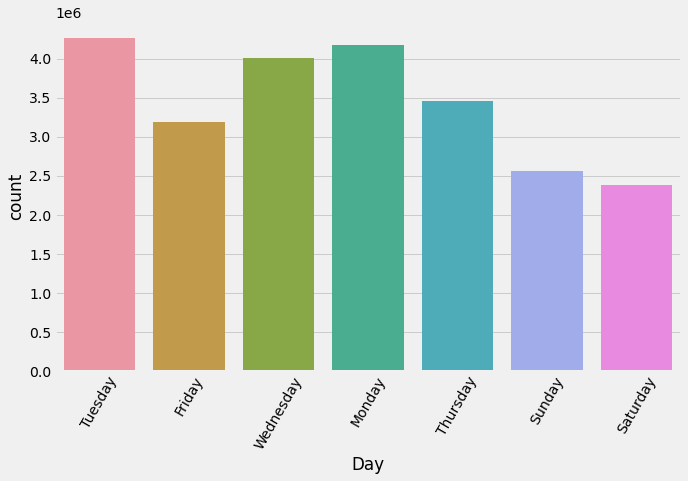

In [10]:
pl.figure(figsize=(10,6))
sns.countplot(df['Day'])
pl.xticks(rotation=60)
pl.show()

In [11]:
df['Rating'].value_counts()

4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: Rating, dtype: int64

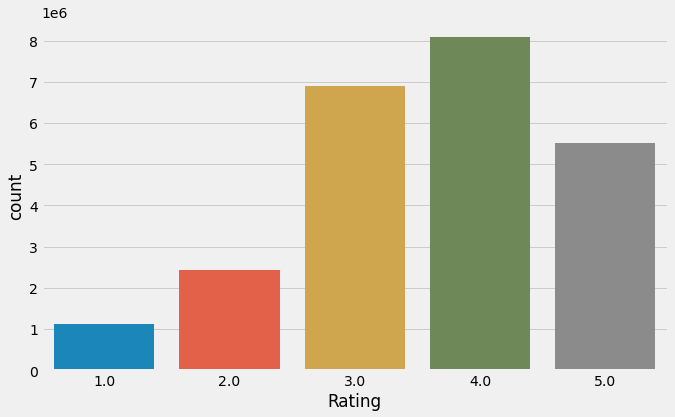

In [12]:
pl.figure(figsize=(10,6))
sns.countplot(df['Rating'])
pl.xticks(rotation=0)
pl.show()

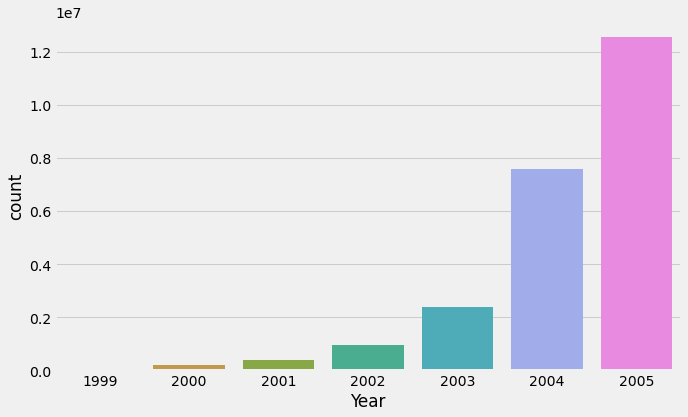

In [13]:
pl.figure(figsize=(10,6))
sns.countplot(df['Year'])
pl.xticks(rotation=0)
pl.show()

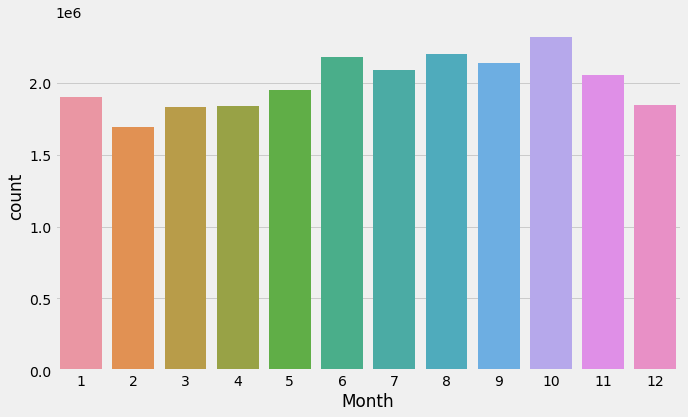

In [14]:
pl.figure(figsize=(10,6))
sns.countplot(df['Month'])
pl.xticks(rotation=0)
pl.show()

In [15]:
movie_count=4498
cust_count=df['Cust_id'].nunique()
rating_count=df['Cust_id'].count()
movie_count,cust_count,rating_count

(4498, 470758, 24053764)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

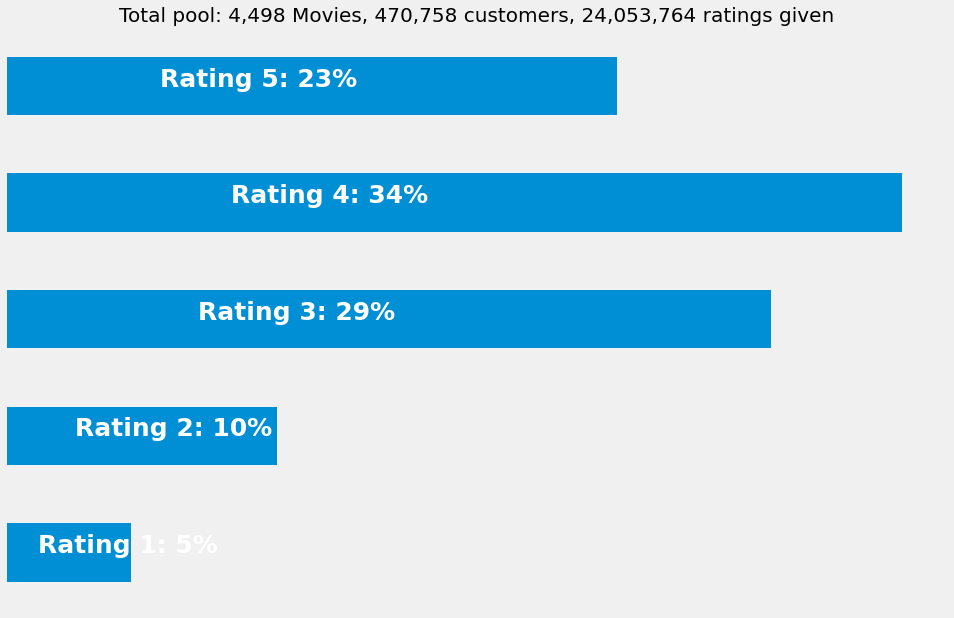

In [16]:
p = df.groupby('Rating')['Rating'].agg(['count'])
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')
for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold',size=25)


In [23]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()
df_nan.head()

,index,Rating
0,548,True
1,694,True
2,2707,True
3,2850,True
4,3991,True


In [24]:
movie_np=[]
movie_id=1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp=np.full((1,i-j-1),movie_id)
    movie_np=np.append(movie_np,temp)
    movie_id+=1


In [29]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.498e+03, 4.498e+03,
       4.498e+03])

In [27]:
last_record=np.full((1,len(df)-df_nan.iloc[-1,0]-1),movie_id)
movie_np=np.append(movie_np,last_record)

In [28]:
print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.498e+03 4.498e+03 4.498e+03]
Length: 24053216


In [36]:
df['Movie_id']=movie_np.astype(int)
df['Cust_id']=df['Cust_id'].astype(int)
print('-Dataset examples-')
print(df.iloc[::5000000, :])

ValueError: Length of values does not match length of index